# IMPACTO DO CORONAVIRUS NA ECONOMIA BRASILEIRA

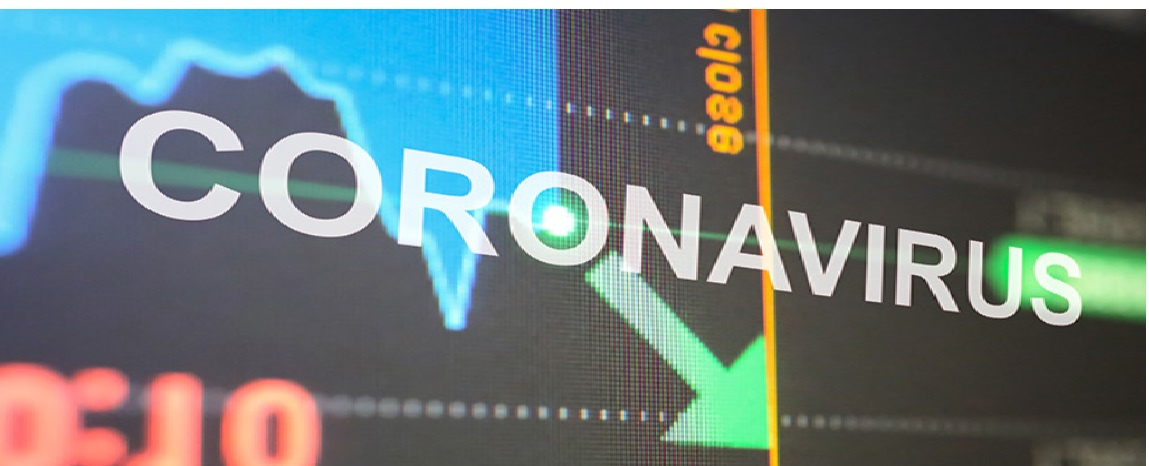

# INTRODUÇÃO
----------------------------

A pandemia do Coronavírus vem deixando rastros de tragédia em muitas famílias, empresas e países. Evidentemente isso afetaria o mercado financeiro, onde a expectativa influencia as tomadas de decisão. Mudanças políticas, catástrofes mundiais, pandemias podem mudar as expectativas dos investidores sobre o futuro de alguns ativos financeiros, bolsas e empresas.
O brasil viveu um momento de extremo risco durante a pandemia, o qual oferecia risco a economia e principalmente a saúde das pessoas. 
Somos um país onde mais observou-se casos de coronavirus a cada 1 milhão de habitantes, sendo o quinto colocado no ranking mundial de mortalidade decorrentes de Coronavírus.
O mercado brasileiro viu o retorno sobre seu patrimônio, um dos maiores indicadores utilizados para medir desempenho em uma empresa, cair drasticamente ao longo dos meses de pandemia.

O objetivo deste projeto é analisar os principais setores economicos e o comportamento de seus ativos. Para executar este estudo foi selecionado ativos dentre os principais setores economicos brasileiros.

Dentre os segmentos abordados estão : Banco, Petróleo e Gás, Companhia Aérea, Varejo e Educação.

**Instituições escolhidas:**

- **Banco do Brasil S.A(BBAS3.SA):** Instituição financeira brasileira composta por sociedade mista, sendo 50% privada e 50% pública.


- **Petrobrás S.A (PETR4.SA):** Empresa de capital aberto, cujo acionista majoritário é o Governo Brasileiro, sendo portanto, uma empresa estatal de economia mista.


- **Gol Linhas Aéreas Inteligentes:** é uma companhia aérea brasileira sediada no Rio de Janeiro, fundada em 2001.


- **Magazine Luiza:** é uma rede varejista de eletrônicos e móveis brasileira, fundada em 1957 na cidade de Franca pelo casal Pelegrino José Donato e sua esposa Luiza Trajano Donato.


- **Cogna Educação:** é a nona maior empresa relacionada a educação do mundo. Foi fundada em 1966 em Belo Horizonte a partir da criação de uma empresa de cursos pré-vestibular chamada Pitágoras.



## Metodologia de análise 

Metodologia

Neste projeyto utilizaremos técnicas de análise exploratória de dados para analisar os dados financeiros, como estatística descritiva e visualizações. Será uma investigação sobre o comportamento do mercado financeiro, então exploraremos alguns conceitos relacionado a esse tema.

A análise está dividida da seguinte maneira:

- A primeira parte está reservada à análise dos preços ao longo do ano de 2020 a 2022, exploraremos métricas simples como média, desvio padrão e correlação.

- A segunda parte é dedicada a estudar a volatilidade (retorno) dos ativos financeiros. E utilizando as  métricas de Robust Covariance, assim conseguiremos comparar as informações dos preços e da volatilidade.

- A terceira parte é onde analisaremos o IBOVESPA, seus preços e volatilidade, e comparando com os ativos antes estudados. Verificaremos as correlações utilizando a descrição e a visualização.

- Por último, vamos concluir nossa análise fazendo um apanhado geral dos dados obtidos e exibindo gráficos úteis para complementar tudo que foi estudado ao longo do texto.

**Robust Covariance**

Conjuntos de dados reais estão frequentemente sujeitos a erros de medição ou registro. Observações regulares, mas incomuns, também podem aparecer por vários motivos. Observações que são muito incomuns são chamadas de outliers. O estimador de covariância empírica e os estimadores de covariância reduzida apresentados acima são muito sensíveis à presença de outliers nos dados. Portanto, deve-se usar estimadores de covariância robustos para estimar a covariância de seus conjuntos de dados reais. Alternativamente, estimadores robustos de covariância podem ser usados ​​para realizar a detecção de outliers e descartar/reduzir algumas observações de acordo com o processamento adicional dos dados.

## Dados
-------------------------------------
Os dados foram obtidos a partir da biblioteca Pandas Data Reader, selecionando o yahoo finance como fonte.

## BIBLIOTECAS
-----------------

In [150]:

#Bibliotecas necessárias
import pandas as pd
import math

import numpy as np
import datetime
import seaborn as sns

!pip install mplfinance
import mplfinance as mpf
sns.set_style('white')
sns.despine(top=True, right=True)
yf.pdr_override()
!pip install arch
from arch import arch_model # roda o modelo garch

from pandas_datareader import data
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import math
from scipy import stats

<Figure size 640x480 with 0 Axes>

## ANALISE EXPLORATÓRIA DE DADOS
-----------------------------------------------------------

Os preços ao longo do mercado de ativos oscilam constantemente, obedecendo a principal lei de mercado que é a de oferta e demanda.

### Ações selecionadas para análise

In [152]:
acoes = ['BBAS3.SA','PETR4.SA','GOLL4.SA', 'JBSS3.SA', 'MGLU3.SA', 'COGN3.SA']

### Definindo periodo de tempo

In [77]:
start='2020-01-01'
end = '2022-02-01'

In [3]:
acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2020-01-01', end = '2022-02-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Carregando base de dados

In [194]:
from datetime import datetime
ativos = 'BBAS3.SA','PETR4.SA','GOLL4.SA', 'JBSS3.SA', 'MGLU3.SA', 'COGN3.SA'


dt_ini, dt_fim = '01/01/2020', '01/02/2022'

dt_ini = datetime.strptime(dt_ini, '%d/%m/%Y').strftime('%Y-%m-%d')
dt_fim = datetime.strptime(dt_fim, '%d/%m/%Y').strftime('%Y-%m-%d')

yf_data4 = yf.download(ativos, start=dt_ini, end=dt_fim)
yf_data4

[*********************100%***********************]  6 of 6 completed


Adj Close                                                       \
             BBAS3.SA COGN3.SA   GOLL4.SA   JBSS3.SA   MGLU3.SA   PETR4.SA   
Date                                                                         
2020-01-02  43.551609    12.20  37.169998  22.084415  12.029735  12.977711   
2020-01-03  43.478752    12.15  35.900002  22.303633  11.922435  12.872029   
2020-01-06  42.904007    11.99  34.250000  21.775879  11.932190  13.024210   
2020-01-07  42.580200    12.08  34.450001  22.165606  11.898049  12.973485   
2020-01-08  42.191635    12.00  35.810001  22.709597  12.263843  12.893165   
...               ...      ...        ...        ...        ...        ...   
2022-01-25  29.177935     2.47  16.840000  33.794285   6.720000  17.159113   
2022-01-26  28.896683     2.55  17.139999  32.737625   6.750000  17.616825   
2022-01-27  29.295883     2.53  17.610001  32.990105   7.220000  17.622028   
2022-01-28  29.477339     2.52  17.010000  33.719479   6.710000  16.925055   
2022-01-31  29.631571     2.58  18.290001  32.812439   7.000000  16.826227   

                Close                                 ...       Open  \
             BBAS3.SA COGN3.SA   GOLL4.SA   JBSS3.SA  ...   GOLL4.SA   
Date                                                  ...              
2020-01-02  53.799999    12.20  37.169998  27.200001  ...  36.680000   
2020-01-03  53.709999    12.15  35.900002  27.469999  ...  36.000000   
2020-01-06  53.000000    11.99  34.250000  26.820000  ...  35.500000   
2020-01-07  52.599998    12.08  34.450001  27.299999  ...  34.650002   
2020-01-08  52.119999    12.00  35.810001  27.969999  ...  34.610001   
...               ...      ...        ...        ...  ...        ...   
2022-01-25  32.160000     2.47  16.840000  36.139999  ...  16.160000   
2022-01-26  31.850000     2.55  17.139999  35.009998  ...  17.070000   
2022-01-27  32.290001     2.53  17.610001  35.279999  ...  17.309999   
2022-01-28  32.490002     2.52  17.010000  36.060001  ...  17.430000   
2022-01-31  32.660000     2.58  18.290001  35.090000  ...  16.990000   

                                             Volume                     \
             JBSS3.SA MGLU3.SA   PETR4.SA  BBAS3.SA  COGN3.SA GOLL4.SA   
Date                                                                     
2020-01-02  26.139999   12.075  30.510000  13159900  12730400  2319400   
2020-01-03  27.000000   12.125  30.879999   9465400  12593300  4342600   
2020-01-06  27.230000   12.100  30.430000   9999900   8944500  6271300   
2020-01-07  27.000000   12.235  30.820000  10638500   7579200  3310300   
2020-01-08  27.930000   12.155  30.690001  21468600   7866300  7156200   
...               ...      ...        ...       ...       ...      ...   
2022-01-25  35.740002    6.360  31.700001  16631000  27053700  4233900   
2022-01-26  36.410000    6.950  33.299999  19772300  46765300  7791300   
2022-01-27  35.060001    6.910  34.250000  15457000  32635600  6707200   
2022-01-28  35.009998    7.210  33.799999  14580000  26431300  5742300   
2022-01-31  36.110001    6.800  32.500000  11010600  22002600  5726500   

                                            
            JBSS3.SA   MGLU3.SA   PETR4.SA  
Date                                        
2020-01-02  14804300   29600800   37774500  
2020-01-03  14712900   26737600   71595600  
2020-01-06  12473500   27359200   81844000  
2020-01-07  16879500   26818800   32822000  
2020-01-08  51996500   40007200   48215600  
...              ...        ...        ...  
2022-01-25   5844000  172082000   98358500  
2022-01-26  11421600  135589900   98679900  
2022-01-27  11873200  161788200   90631000  
2022-01-28   7720500  185694500  117400500  
2022-01-31   9749800  149358700   62450300  

[516 rows x 36 columns]

In [184]:
yf_data4.describe()

Adj Close                                                              \
         BBAS3.SA    COGN3.SA    GOLL4.SA    JBSS3.SA    MGLU3.SA    PETR4.SA   
count  619.000000  619.000000  619.000000  619.000000  619.000000  619.000000   
mean    28.875793    4.667835   19.845331   25.145789   15.633654   12.081367   
std      4.253316    2.451214    5.962845    6.578141    7.204500    3.359889   
min     18.166691    2.000000    5.600000   13.599776    2.340000    4.772585   
25%     26.018872    2.750000   16.655000   18.873525    8.633436    9.609292   
50%     28.001162    4.170000   19.110001   24.464140   16.670732   11.913323   
75%     31.165462    5.215000   23.030001   32.571642   21.830168   13.464425   
max     43.551605   12.790000   39.049999   36.496704   27.401571   20.598558   

            Close                                      ...        Open  \
         BBAS3.SA    COGN3.SA    GOLL4.SA    JBSS3.SA  ...    GOLL4.SA   
count  619.000000  619.000000  619.000000  619.000000  ...  619.000000   
mean    33.473069    4.667835   19.845331   28.829903  ...   19.920614   
std      5.279127    2.451214    5.962845    6.163501  ...    5.960717   
min     22.129999    2.000000    5.600000   16.750000  ...    5.540000   
25%     30.059999    2.750000   16.655000   22.730000  ...   16.549999   
50%     32.619999    4.170000   19.110001   28.809999  ...   19.299999   
75%     34.725000    5.215000   23.030001   35.094999  ...   23.049999   
max     53.799999   12.790000   39.049999   39.049999  ...   39.209999   

                                                 Volume                \
         JBSS3.SA    MGLU3.SA    PETR4.SA      BBAS3.SA      COGN3.SA   
count  619.000000  619.000000  619.000000  6.190000e+02  6.190000e+02   
mean    28.854669   15.730683   25.998061  1.680250e+07  4.695174e+07   
std      6.169726    7.191640    4.808779  8.306547e+06  2.760182e+07   
min     14.500000    2.380000   11.070000  0.000000e+00  6.228500e+06   
25%     22.895000    8.792500   22.755000  1.130930e+07  3.061015e+07   
50%     28.799999   16.795000   27.020000  1.501180e+07  4.158950e+07   
75%     35.009998   21.892500   29.245000  2.077650e+07  5.694485e+07   
max     39.340000   28.150000   35.259998  1.020361e+08  2.952332e+08   

                                                               
           GOLL4.SA      JBSS3.SA      MGLU3.SA      PETR4.SA  
count  6.190000e+02  6.190000e+02  6.190000e+02  6.190000e+02  
mean   8.946232e+06  1.450283e+07  6.551415e+07  7.683860e+07  
std    5.530713e+06  8.639212e+06  4.853147e+07  3.871347e+07  
min    1.518400e+06  0.000000e+00  0.000000e+00  2.406000e+07  
25%    5.502800e+06  8.964250e+06  3.106885e+07  5.231260e+07  
50%    7.282600e+06  1.250560e+07  4.590440e+07  6.796230e+07  
75%    1.082020e+07  1.769015e+07  8.652815e+07  9.028730e+07  
max    4.368050e+07  9.417500e+07  2.696417e+08  4.902304e+08  

[8 rows x 36 columns]

In [174]:
yf_data4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 619 entries, 2020-01-02 to 2022-06-30
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BBAS3.SA)  619 non-null    float64
 1   (Adj Close, COGN3.SA)  619 non-null    float64
 2   (Adj Close, GOLL4.SA)  619 non-null    float64
 3   (Adj Close, JBSS3.SA)  619 non-null    float64
 4   (Adj Close, MGLU3.SA)  619 non-null    float64
 5   (Adj Close, PETR4.SA)  619 non-null    float64
 6   (Close, BBAS3.SA)      619 non-null    float64
 7   (Close, COGN3.SA)      619 non-null    float64
 8   (Close, GOLL4.SA)      619 non-null    float64
 9   (Close, JBSS3.SA)      619 non-null    float64
 10  (Close, MGLU3.SA)      619 non-null    float64
 11  (Close, PETR4.SA)      619 non-null    float64
 12  (High, BBAS3.SA)       619 non-null    float64
 13  (High, COGN3.SA)       619 non-null    float64
 14  (High, GOLL4.SA)       619 non-null    

### Desenhando gráfico de variação do periodo

In [96]:

stocks = ['BBAS3.SA','PETR4.SA','GOLL4.SA', 'JBSS3.SA', 'MGLU3.SA', 'COGN3.SA']
p_data = pd.DataFrame()

for s in stocks:
    p_data[s] = yf.download(s, start=start, end=end, progress=False)['Adj Close']

<AxesSubplot: xlabel='Date'>

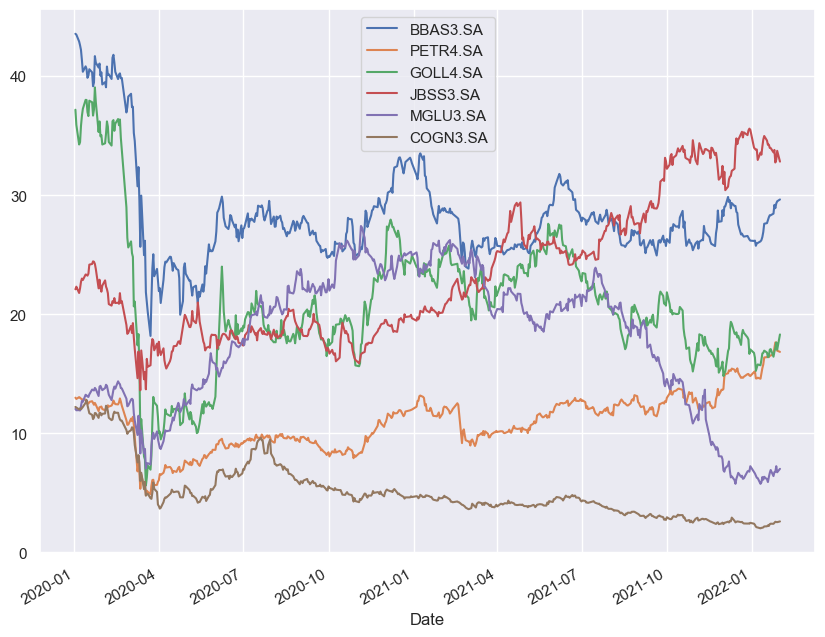

In [104]:
p_data.plot(figsize=(10,8))


Observa-se que os preços cairam na mesma época do ano. Todos em março quase entrando em abril, se analisarmos foi a época em que iniciaram os isolamentos sociais, os comércios fecharam, a mortalidade começou a alcançar niveis preocupantes e o mercado começou a despencar. Até aquele ponto, a sociedade e o mercado possuíam informações não significativas sobre o acontecimento dos próximos meses. A resposta diante de tal incerteza foi a mesma das expectativas : para baixo!

## ANALISE DE VOLATILIDADE
----------------------------------------------


A volatilidade é uma variável que representa a frequência e intensidade oscilações no preço de um ativo num determinado período de tempo. Quanto maior a volatilidade, maior a variação do preço do ativo. Mas a volatilidade vai além disso. Ela é correlata também com o próprio mercado. Os índices do mercado financeiro podem ser influenciados por uma série de fatores externos, como cenário político, o otimismo e pessimismo dos investidores, ou uma pandemia.

In [264]:
volatilidade = pd.DataFrame(p_data.std(), columns= ['Volatilidade'])

In [265]:
vol = pd.concat([volatilidade], axis = 1)
vol 

,Volatilidade
BBAS3.SA,4.330920
PETR4.SA,2.359478
GOLL4.SA,5.965143
JBSS3.SA,5.745148
MGLU3.SA,5.904714
COGN3.SA,2.458449


<AxesSubplot: >

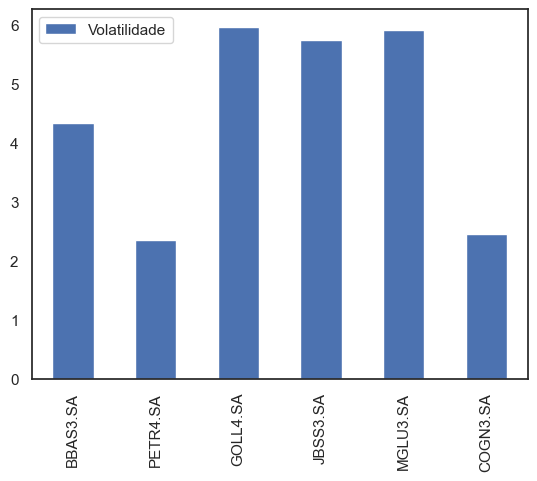

In [266]:
vol.plot.bar()

O gráfico anterior permite uma comparação entre os ativos de modo a identificar a disparidade entre a volatilidade quando comparados uns aos outros. Seguindo esta lógica observamos que as ações da Gol, JBS e Magazine Luiza são as três maiores oscilações, seguido de Banco do Brasil e Cogna Educação.

### Analise de volatilidade por método de Covariância Robusta (Robust Covariance)

---------------------------------------------------------

Neste tópico abordaremos as ações selecionadas e sua volatilidade através do método denominado Robust Covariance.

### Ações Petrobrás

In [114]:
# Busca os preços ajustados de PETR4
petr = pdr.get_data_yahoo('PETR4.SA', start = start, end = end)[['Adj Close']]

# Transforma em retornos contínuos
petr['return'] = np.log(petr[['Adj Close']]) - np.log(petr[['Adj Close']].shift(1))

# Retira os dados faltantes
petr = petr.dropna()

[*********************100%***********************]  1 of 1 completed


C:\Users\lucas\AppData\Local\Temp\ipykernel_4296\3973651471.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
# Especifica o modelo
petr_gm = arch_model(petr['return'], p = 1, q = 1,
                     mean = 'constant', vol = 'GARCH', dist = 'normal')

# Roda o modelo
petr_fit = petr_gm.fit(disp = 'off')

C:\Users\lucas\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001368. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [116]:
# Visualiza os parâmetros
petr_fit.params

# mu          0.002439
# omega       0.000101
# alpha[1]    0.199998
# beta[1]     0.699992
# Name: params, dtype: float64

mu          0.002330
omega       0.000137
alpha[1]    0.200000
beta[1]     0.699999
Name: params, dtype: float64

In [117]:
# Sumariza os resultados
petr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1105.05
Distribution:                  Normal   AIC:                          -2202.10
Method:            Maximum Likelihood   BIC:                          -2185.13
                                        No. Observations:                  515
Date:                Mon, May 22 2023   Df Residuals:                      514
Time:                        14:11:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.3299e-03  1.001e-03      2.327  1.994e-02 [3.679e-04,4.292e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3685e-04  1.221e-04      1.121      0.262 [-1.025e-04,3.762e-04]
alpha[1]       0.2000      0.125      1.603      0.109   [-4.458e-02,  0.445]
beta[1]        0.7000      0.147      4.776  1.790e-06      [  0.413,  0.987]
=============================================================================

Covariance estimator: robust
"""

<AxesSubplot: xlabel='Date'>

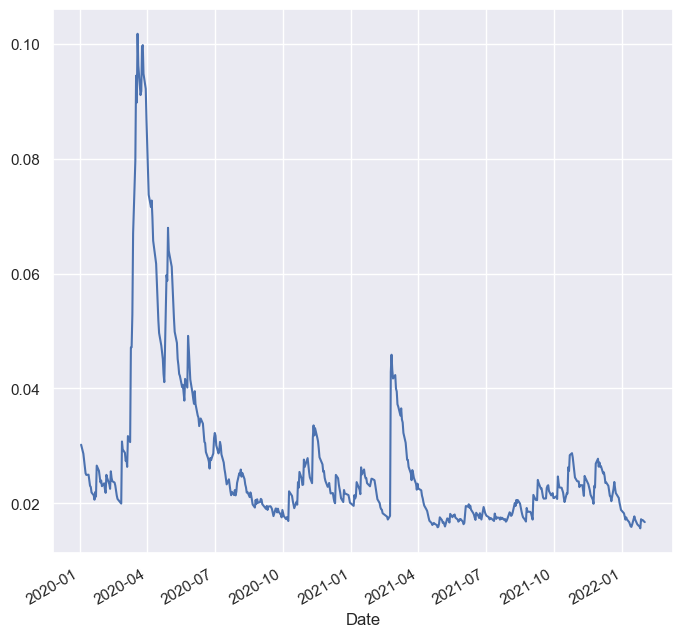

In [129]:
# Plota 
plt.figure(figsize=(8,8))
petr_fit.conditional_volatility.plot()

### Ações Banco do Brasil

In [122]:
# Busca os preços ajustados de PETR4
bb = pdr.get_data_yahoo('BBAS3.SA', start = start, end = end)[['Adj Close']]

# Transforma em retornos contínuos
bb['return'] = np.log(bb[['Adj Close']]) - np.log(bb[['Adj Close']].shift(1))

# Retira os dados faltantes
bb = bb.dropna()

[*********************100%***********************]  1 of 1 completed


C:\Users\lucas\AppData\Local\Temp\ipykernel_4296\2458059598.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
# Especifica o modelo
bb_gm = arch_model(bb['return'], p = 1, q = 1,
                     mean = 'constant', vol = 'GARCH', dist = 'normal')

# Roda o modelo
bb_fit = bb_gm.fit(disp = 'off')

C:\Users\lucas\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009431. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [124]:
# Visualiza os parâmetros
bb_fit.params

# mu          0.002439
# omega       0.000101
# alpha[1]    0.199998
# beta[1]     0.699992
# Name: params, dtype: float64

mu          0.000458
omega       0.000028
alpha[1]    0.097843
beta[1]     0.860483
Name: params, dtype: float64

In [125]:
# Sumariza os resultados
bb_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1188.90
Distribution:                  Normal   AIC:                          -2369.79
Method:            Maximum Likelihood   BIC:                          -2352.82
                                        No. Observations:                  515
Date:                Mon, May 22 2023   Df Residuals:                      514
Time:                        14:23:04   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.5816e-04  9.202e-04      0.498      0.619 [-1.345e-03,2.262e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.7687e-05  6.499e-06      4.260  2.045e-05 [1.495e-05,4.043e-05]
alpha[1]       0.0978  2.943e-02      3.325  8.854e-04   [4.016e-02,  0.156]
beta[1]        0.8605  3.357e-02     25.634 6.443e-145     [  0.795,  0.926]
============================================================================

Covariance estimator: robust
"""

<AxesSubplot: xlabel='Date'>

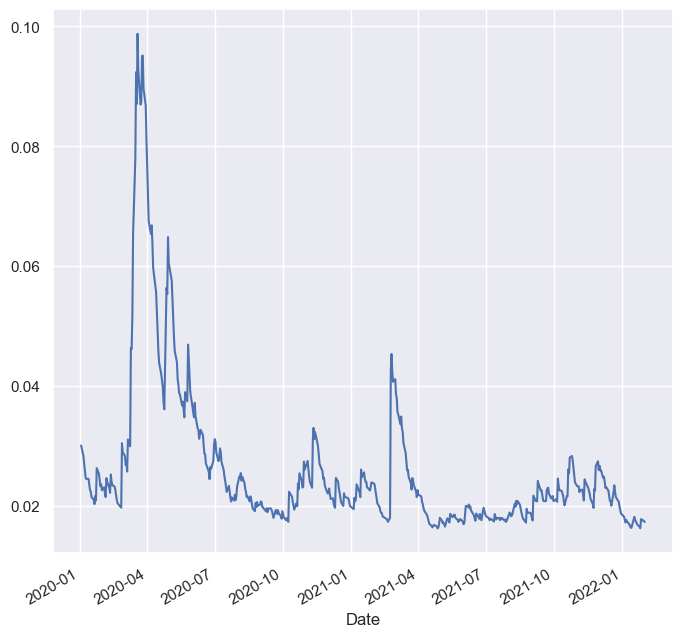

In [128]:
# Plota 
plt.figure(figsize=(8,8))
bb_fit.conditional_volatility.plot()

### Ações GOL

In [130]:
# Busca os preços ajustados de PETR4
gol = pdr.get_data_yahoo('GOLL4.SA', start = start, end = end)[['Adj Close']]

# Transforma em retornos contínuos
gol['return'] = np.log(gol[['Adj Close']]) - np.log(gol[['Adj Close']].shift(1))

# Retira os dados faltantes
gol = gol.dropna()

[*********************100%***********************]  1 of 1 completed


C:\Users\lucas\AppData\Local\Temp\ipykernel_4296\3167514001.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
# Especifica o modelo
gol_gm = arch_model(gol['return'], p = 1, q = 1,
                     mean = 'constant', vol = 'GARCH', dist = 'normal')

# Roda o modelo
gol_fit = gol_gm.fit(disp = 'off')

C:\Users\lucas\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003102. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [132]:
# Visualiza os parâmetros
gol_fit.params

# mu          0.002439
# omega       0.000101
# alpha[1]    0.199998
# beta[1]     0.699992
# Name: params, dtype: float64

mu          0.000053
omega       0.000062
alpha[1]    0.199999
beta[1]     0.780001
Name: params, dtype: float64

In [133]:
# Sumariza os resultados
gol_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                897.018
Distribution:                  Normal   AIC:                          -1786.04
Method:            Maximum Likelihood   BIC:                          -1769.06
                                        No. Observations:                  515
Date:                Mon, May 22 2023   Df Residuals:                      514
Time:                        14:45:46   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.3136e-05  1.736e-03  3.061e-02      0.976 [-3.349e-03,3.455e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.2036e-05  3.398e-05      1.826  6.788e-02 [-4.558e-06,1.286e-04]
alpha[1]       0.2000  6.194e-02      3.229  1.244e-03    [7.859e-02,  0.321]
beta[1]        0.7800  6.252e-02     12.477  9.979e-36      [  0.657,  0.903]
=============================================================================

Covariance estimator: robust
"""

<AxesSubplot: xlabel='Date'>

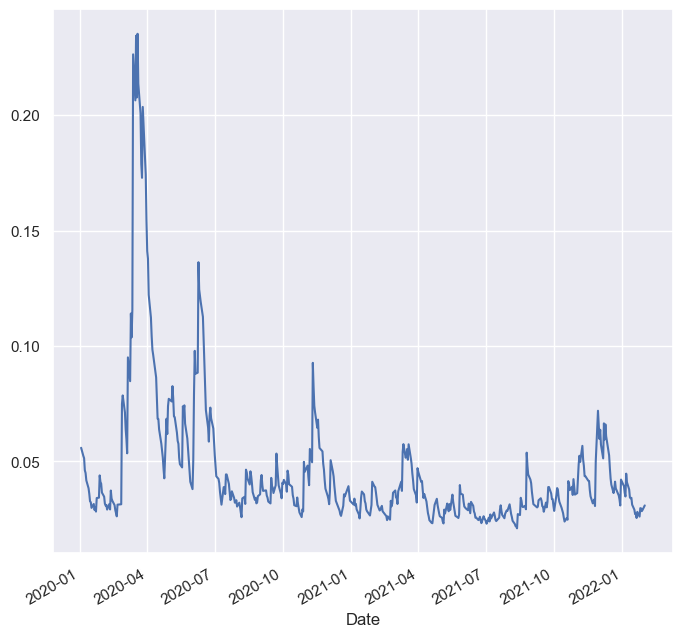

In [134]:
# Plota 
plt.figure(figsize=(8,8))
gol_fit.conditional_volatility.plot()

### Ações JBS

In [135]:
# Busca os preços ajustados de PETR4
jbs = pdr.get_data_yahoo('JBSS3.SA', start = start, end = end)[['Adj Close']]

# Transforma em retornos contínuos
jbs['return'] = np.log(jbs[['Adj Close']]) - np.log(jbs[['Adj Close']].shift(1))

# Retira os dados faltantes
jbs = jbs.dropna()

[*********************100%***********************]  1 of 1 completed


C:\Users\lucas\AppData\Local\Temp\ipykernel_4296\3174496193.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
# Especifica o modelo
jbs_gm = arch_model(jbs['return'], p = 1, q = 1,
                     mean = 'constant', vol = 'GARCH', dist = 'normal')

# Roda o modelo
jbs_fit = jbs_gm.fit(disp = 'off')

C:\Users\lucas\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008886. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [137]:
# Visualiza os parâmetros
jbs_fit.params

# mu          0.002439
# omega       0.000101
# alpha[1]    0.199998
# beta[1]     0.699992
# Name: params, dtype: float64

mu          0.001567
omega       0.000018
alpha[1]    0.099999
beta[1]     0.879990
Name: params, dtype: float64

In [138]:
# Sumariza os resultados
jbs_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1199.03
Distribution:                  Normal   AIC:                          -2390.05
Method:            Maximum Likelihood   BIC:                          -2373.08
                                        No. Observations:                  515
Date:                Mon, May 22 2023   Df Residuals:                      514
Time:                        14:45:52   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.5669e-03  9.527e-04      1.645      0.100 [-3.003e-04,3.434e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.7880e-05  1.756e-06     10.181  2.413e-24 [1.444e-05,2.132e-05]
alpha[1]       0.1000  4.071e-02      2.457  1.403e-02   [2.022e-02,  0.180]
beta[1]        0.8800  2.522e-02     34.892 9.754e-267     [  0.831,  0.929]
============================================================================

Covariance estimator: robust
"""

<AxesSubplot: xlabel='Date'>

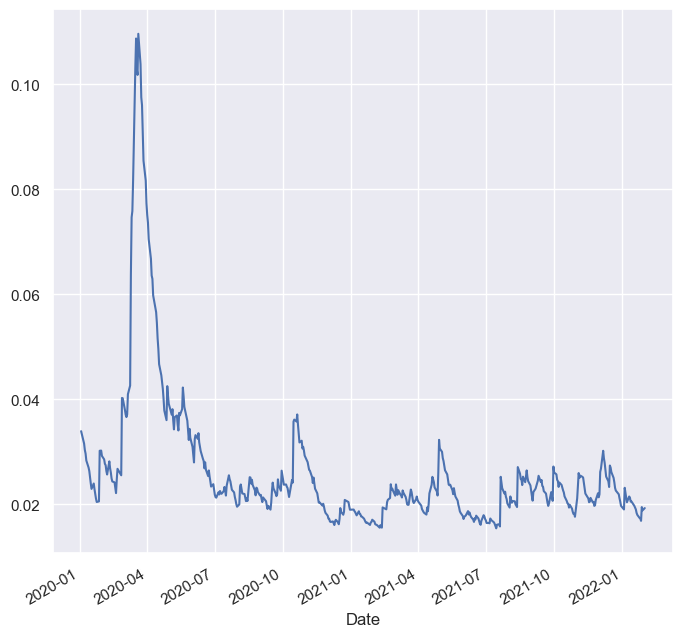

In [139]:
# Plota 
plt.figure(figsize=(8,8))
jbs_fit.conditional_volatility.plot()

### Ações Magazine Luiza

In [140]:
# Busca os preços ajustados de PETR4
mglu = pdr.get_data_yahoo('MGLU3.SA', start = start, end = end)[['Adj Close']]

# Transforma em retornos contínuos
mglu['return'] = np.log(mglu[['Adj Close']]) - np.log(mglu[['Adj Close']].shift(1))

# Retira os dados faltantes
mglu = mglu.dropna()

[*********************100%***********************]  1 of 1 completed


C:\Users\lucas\AppData\Local\Temp\ipykernel_4296\2428505375.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
# Especifica o modelo
mglu_gm = arch_model(mglu['return'], p = 1, q = 1,
                     mean = 'constant', vol = 'GARCH', dist = 'normal')

# Roda o modelo
mglu_fit = mglu_gm.fit(disp = 'off')

C:\Users\lucas\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001691. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [142]:
# Visualiza os parâmetros
mglu_fit.params

# mu          0.002439
# omega       0.000101
# alpha[1]    0.199998
# beta[1]     0.699992
# Name: params, dtype: float64

mu          0.000694
omega       0.000049
alpha[1]    0.121343
beta[1]     0.849756
Name: params, dtype: float64

In [143]:
# Sumariza os resultados
mglu_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1014.24
Distribution:                  Normal   AIC:                          -2020.47
Method:            Maximum Likelihood   BIC:                          -2003.50
                                        No. Observations:                  515
Date:                Mon, May 22 2023   Df Residuals:                      514
Time:                        14:45:58   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.9440e-04  1.366e-03      0.508      0.611 [-1.982e-03,3.371e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.9316e-05  1.500e-05      3.288  1.008e-03 [1.992e-05,7.871e-05]
alpha[1]       0.1213  3.210e-02      3.780  1.569e-04   [5.842e-02,  0.184]
beta[1]        0.8498  2.525e-02     33.648 3.367e-248     [  0.800,  0.899]
============================================================================

Covariance estimator: robust
"""

<AxesSubplot: xlabel='Date'>

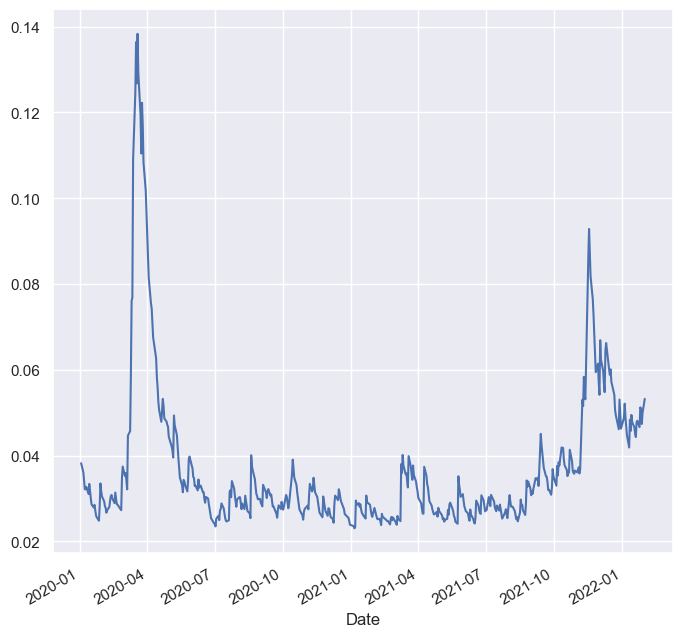

In [144]:
# Plota 
plt.figure(figsize=(8,8))
mglu_fit.conditional_volatility.plot()

### Ações Cogna Educação

In [145]:
# Busca os preços ajustados de PETR4
cogn = pdr.get_data_yahoo('COGN3.SA', start = start, end = end)[['Adj Close']]

# Transforma em retornos contínuos
cogn['return'] = np.log(cogn[['Adj Close']]) - np.log(cogn[['Adj Close']].shift(1))

# Retira os dados faltantes
cogn = cogn.dropna()

[*********************100%***********************]  1 of 1 completed


C:\Users\lucas\AppData\Local\Temp\ipykernel_4296\2518702363.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
# Especifica o modelo
cogn_gm = arch_model(cogn['return'], p = 1, q = 1,
                     mean = 'constant', vol = 'GARCH', dist = 'normal')

# Roda o modelo
cogn_fit = cogn_gm.fit(disp = 'off')

C:\Users\lucas\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001877. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [147]:
# Visualiza os parâmetros
cogn_fit.params

# mu          0.002439
# omega       0.000101
# alpha[1]    0.199998
# beta[1]     0.699992
# Name: params, dtype: float64

mu         -0.002577
omega       0.000085
alpha[1]    0.138097
beta[1]     0.811754
Name: params, dtype: float64

In [148]:
# Sumariza os resultados
cogn_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                966.889
Distribution:                  Normal   AIC:                          -1925.78
Method:            Maximum Likelihood   BIC:                          -1908.80
                                        No. Observations:                  515
Date:                Mon, May 22 2023   Df Residuals:                      514
Time:                        14:46:14   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.5769e-03  1.469e-03     -1.754  7.939e-02 [-5.456e-03,3.022e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.4624e-05  3.917e-05      2.161  3.073e-02 [7.855e-06,1.614e-04]
alpha[1]       0.1381  4.329e-02      3.190  1.423e-03   [5.324e-02,  0.223]
beta[1]        0.8118  5.179e-02     15.674  2.269e-55     [  0.710,  0.913]
============================================================================

Covariance estimator: robust
"""

<AxesSubplot: xlabel='Date'>

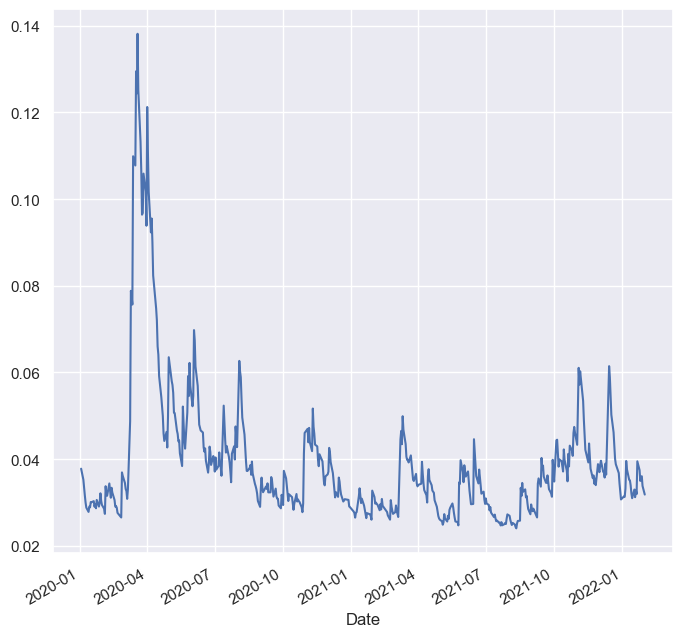

In [149]:
# Plota 
plt.figure(figsize=(8,8))
cogn_fit.conditional_volatility.plot()

Como podemos observar, entre março e maio, as variações do preço do ativo foram muito mais intensas, e isso é representado pelas oscilações nos gráficos. O que explica essa oscilação nessa intensidade? A explicação mais plausível é que esse foi o período onde começaram os isolamentos sociais, e as quarentenas. Seguido do fechamento de comércios e muitos postos de trabalho

## CORRELAÇÕES
-----------------------------

Os ativos no mercado costumam se comportar de maneira similar em casos de crise ou de boom, porque a economia vai perdendo ou ganhando como um todo, o que por sua vez reflete o resultado no mercado financeiro.

Um guia para interpretar correlações:

Utilizaremos a correlação de Pearson nessa análise, ela se encaixa melhor com o objetivo do projeto.

- **1.0** positivo ou negativo indica uma correlação perfeita
- **0.9** positivo ou negativo indica uma correlação muito forte.
- **0.7 a 0.9** positivo ou negativo indica uma correlação forte.
- **0.5 a 0.7** positivo ou negativo indica uma correlação moderada.
- **0.3 a 0.5** positivo ou negativo indica uma correlação fraca.
- **0.1 a 0.3** positivo ou negativo indica uma correlação desprezível.
- **0** indica uma correlação inexistente

In [278]:
volat =p_data.corr()
volat

,BBAS3.SA,PETR4.SA,GOLL4.SA,JBSS3.SA,MGLU3.SA,COGN3.SA
BBAS3.SA,1.000000,0.408434,0.846438,-0.039231,-0.041570,0.728364
PETR4.SA,0.408434,1.000000,0.404597,0.789691,-0.251231,-0.213486
GOLL4.SA,0.846438,0.404597,1.000000,0.039390,0.270391,0.571481
JBSS3.SA,-0.039231,0.789691,0.039390,1.000000,-0.436787,-0.525672
MGLU3.SA,-0.041570,-0.251231,0.270391,-0.436787,1.000000,0.029619
COGN3.SA,0.728364,-0.213486,0.571481,-0.525672,0.029619,1.000000


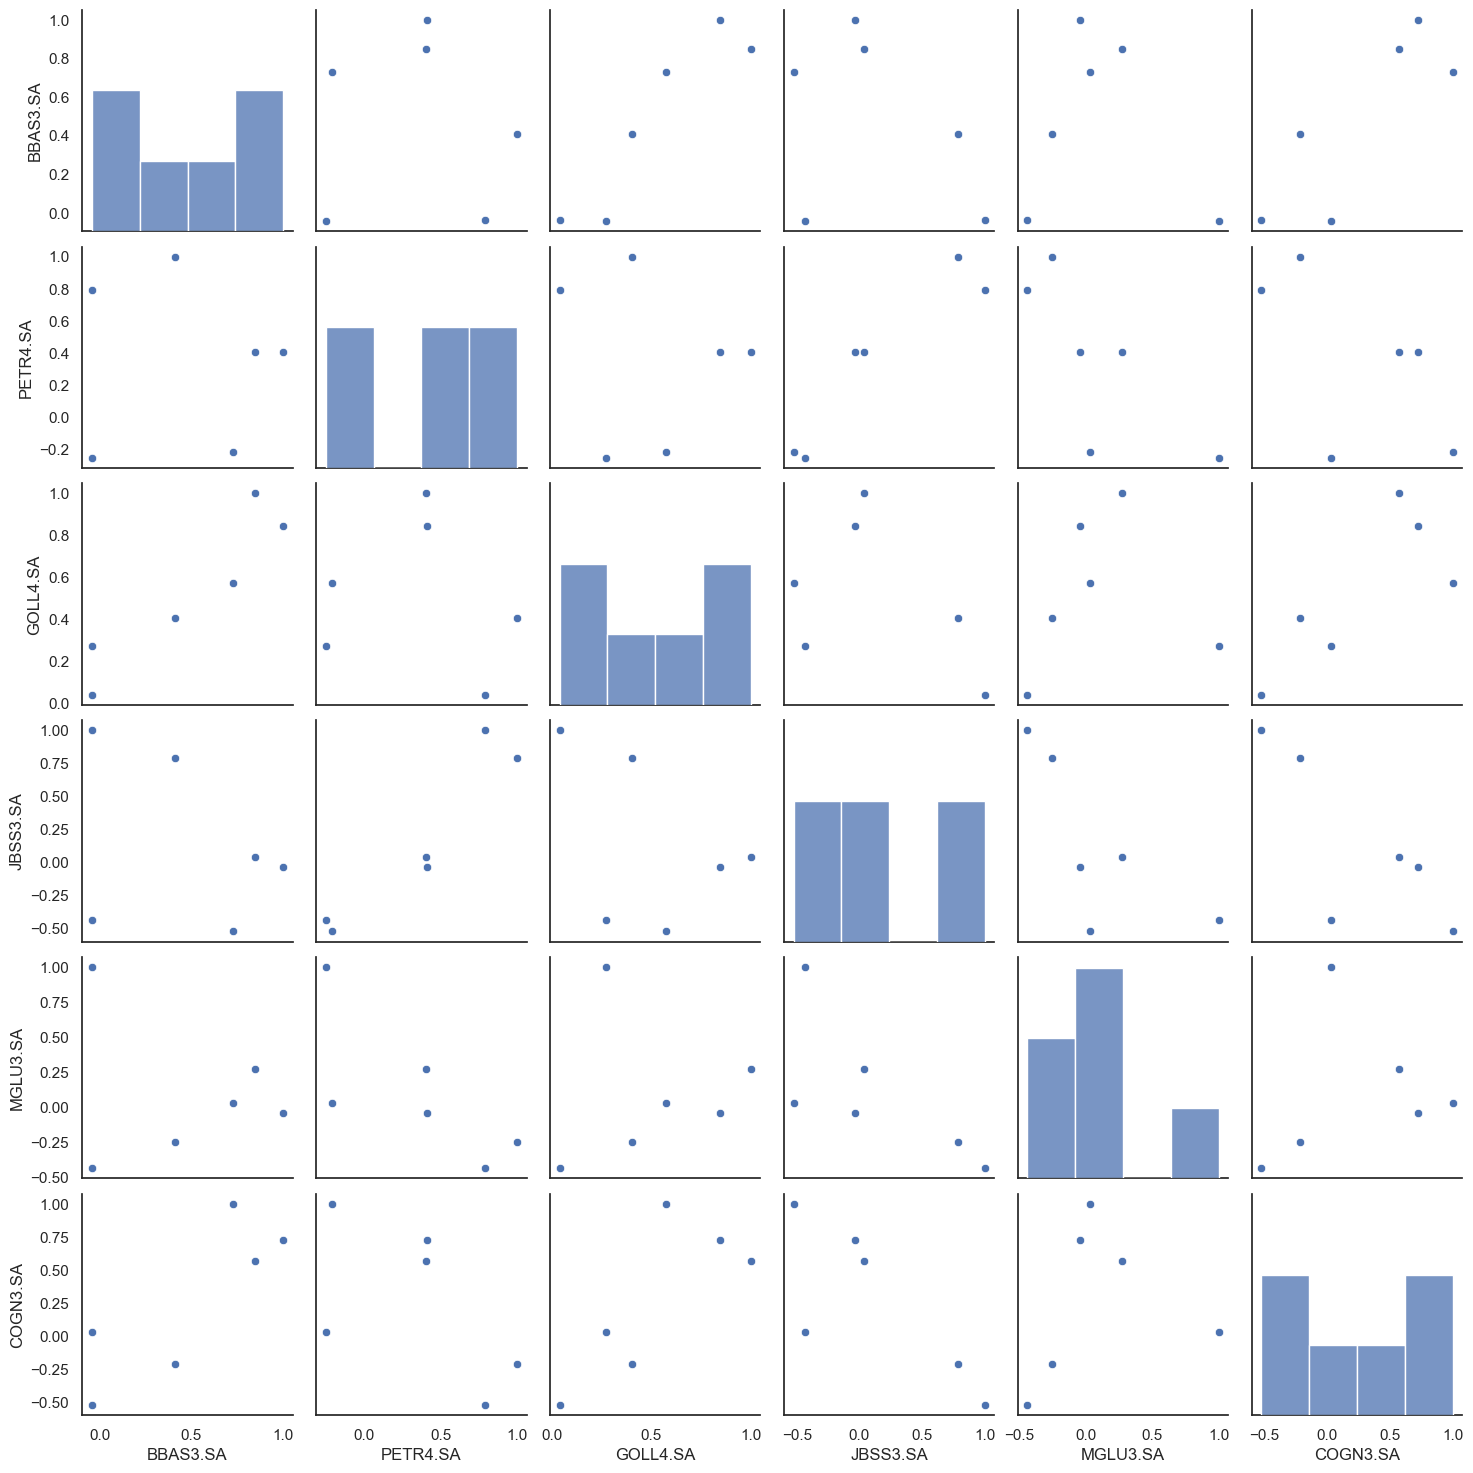

In [279]:
sns.pairplot(volat);

### Análise do IBOVESPA

In [285]:
IBOVESPA = '^BVSP'


dt_ini, dt_fim = '01/01/2020', '01/02/2022'

dt_ini = datetime.strptime(dt_ini, '%d/%m/%Y').strftime('%Y-%m-%d')
dt_fim = datetime.strptime(dt_fim, '%d/%m/%Y').strftime('%Y-%m-%d')

IBOV = yf.download(IBOVESPA, start=dt_ini, end=dt_fim)
IBOV

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2022-01-25,107935.0,110115.0,107185.0,109845.0,109845.0,13713900
2022-01-26,110207.0,112695.0,110204.0,111573.0,111573.0,15513800
2022-01-27,111303.0,113057.0,111303.0,112315.0,112315.0,14812000


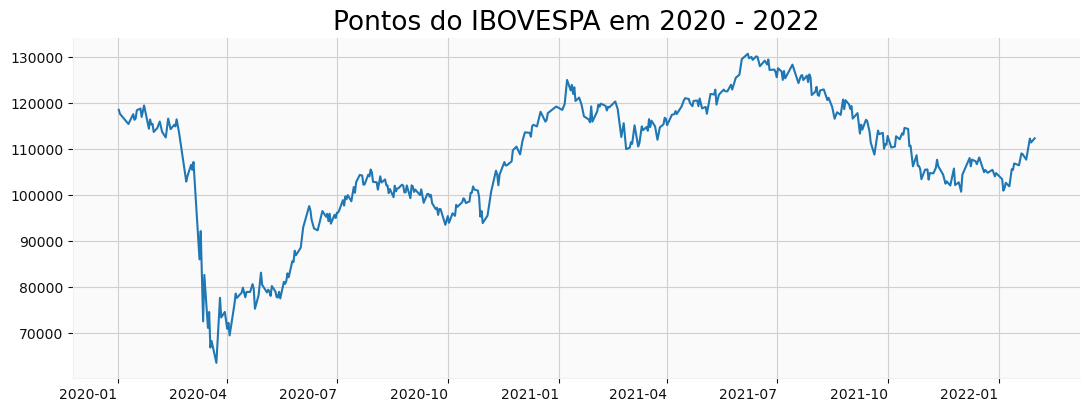

In [299]:

IBOV['Close'].plot(figsize=(13,5))
plt.xticks(rotation=360)
sns.despine()
plt.title('Pontos do IBOVESPA em 2020 - 2022',fontsize=19)
plt.xlabel('');
     

Text(0.5, 0, '')

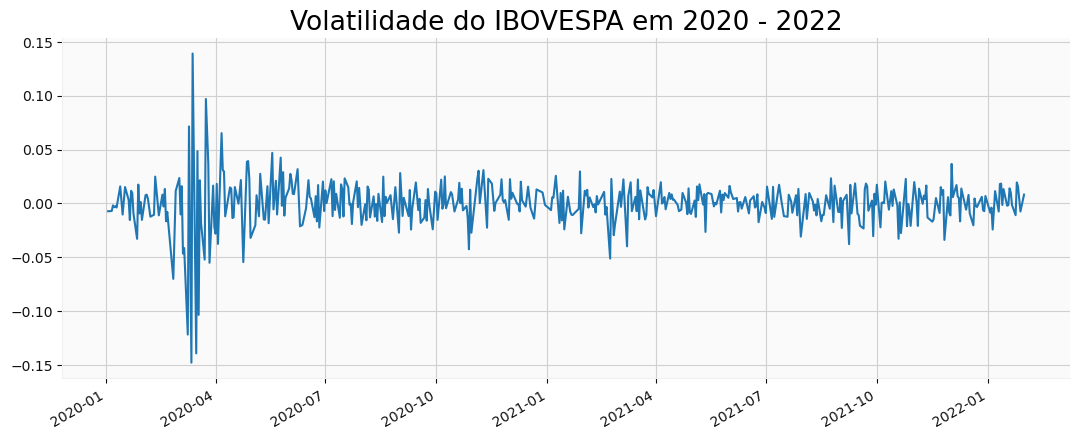

In [298]:
IBOVESPA_volat = IBOV['Close'].pct_change()
IBOVESPA_volat.plot(figsize=(13,5))
sns.despine()
plt.title('Volatilidade do IBOVESPA em 2020 - 2022',fontsize=19)
plt.xlabel('')

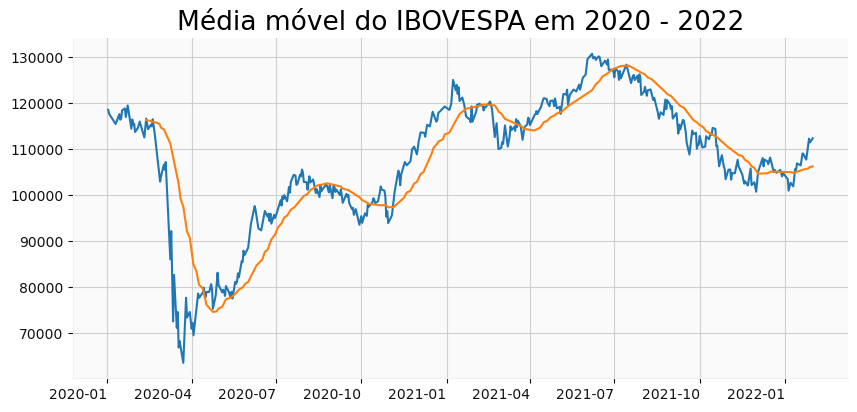

In [296]:

IBOV['Close'].plot()
IBOV['Close'].rolling(30).mean().plot(figsize=(10,5))
plt.xticks(rotation=360)
plt.xlabel('')
plt.title('Média móvel do IBOVESPA em 2020 - 2022', fontsize=19)
sns.despine()

## CONCLUSÃO
------------------------------------

Baseado na análise desse projeto, podemos concluir o que já era sabido: a crise do coronavírus abalou o mercado financeiro, causou incerteza por um determinado período de tempo, mas desde então se acalmou. Olhando as métricas, podemos ver que a bolsa de valores acompanhou o preço e a volatilidade de alguns ativos, ambos caindo no mesmo período, o período de maior incerteza e desinformação. Estamos vivendo um momento ímpar, que veio devastando sistemas de saúde, vidas, famílias.

A educação parou, a vida de muita gente parou, empresas não resistiram, famílias se distanciaram. Uma análise sobre o mercado financeiro é muito pouco para buscar entender o que essa pandemia causou no Brasil e no mundo.

Agora com a vacina, estamos mais perto de controlar o contágio, e assim poderemos nos abraçar novamente, visitar parentes e amigos. E quando a estabilidade voltar, empresas ressurgirão, pais e filhos se encontrarão, mercados se reerguirão.

Abaixo, um gráfico de candlestick, que mostra a variação diária do preço no IBOVESPA

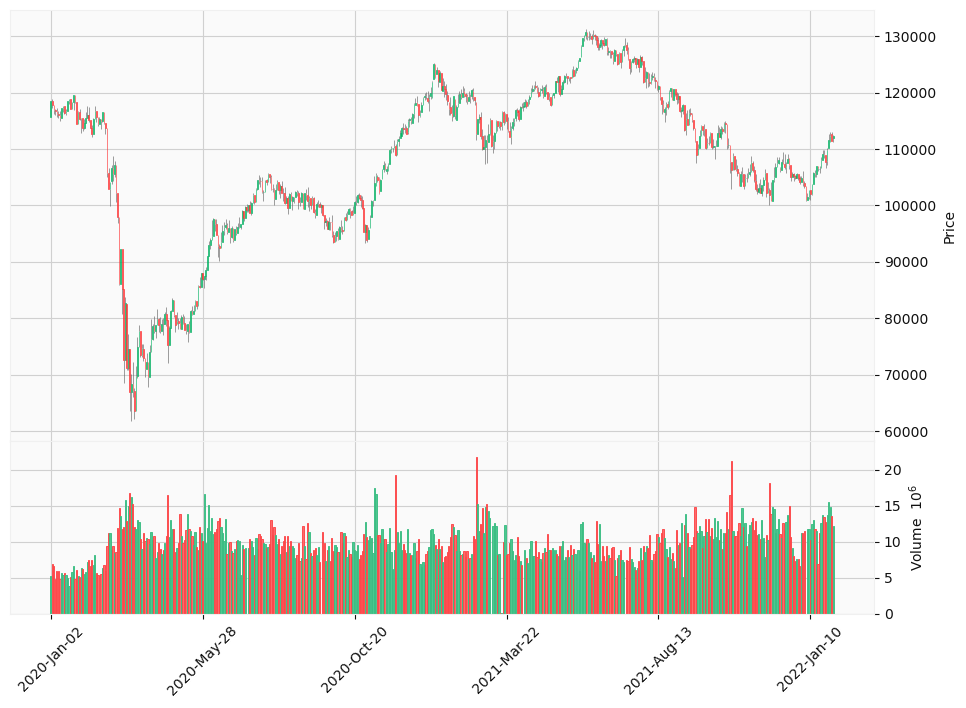

In [294]:
mpf.plot(IBOV, type='candle', style='yahoo', volume=True, figscale=1.5)